In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [8]:
data=pd.read_csv(r"C:\Users\pvalb\Desktop\python\car data.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


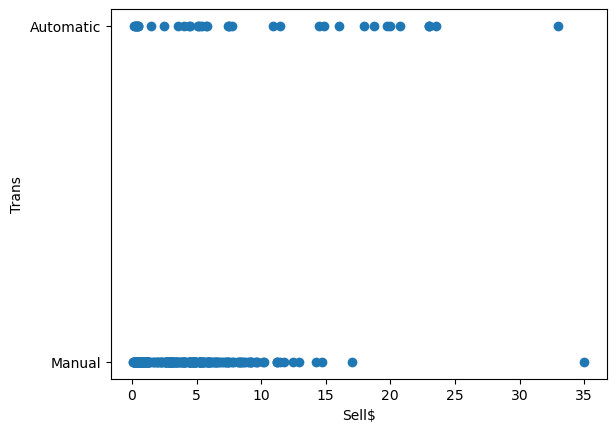

In [12]:
a,b=plt.subplots()
b.scatter(x=data['Selling_Price'],y=data['Transmission'])
plt.ylabel('Trans',fontsize=10)
plt.xlabel('Sell$',fontsize=10)
plt.show()

In [13]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


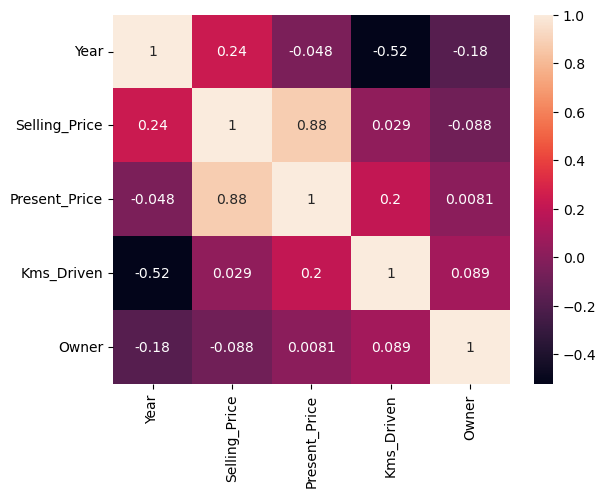

In [16]:
plt.figure()
sns.heatmap(data.corr(),annot=True)
plt.show()

In [32]:
x=data.drop(['Car_Name','Fuel_Type','Selling_Price','Seller_Type','Transmission'],axis=1)
y=data['Selling_Price']
print(x.shape,y.shape)

(301, 4) (301,)


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(240, 4) (61, 4)
(240,) (61,)


In [34]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
p=lr.predict(x_test)

In [52]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(p,y_test)
print("MSE=",mse)
rmse=np.sqrt(mse)
print('RMSE=',rmse)
print('r2=',r2_score(y_test,p))

MSE= 4.122560047936849
RMSE= 2.03040883763267
r2= 0.8210351448079988


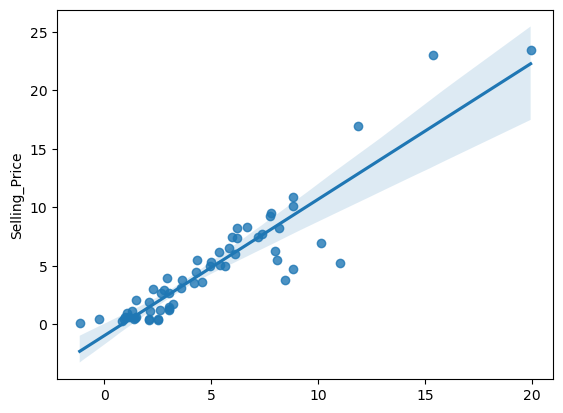

In [47]:
sns.regplot(p,y_test)
plt.show()

In [53]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.001)
R.fit(x_train,y_train)
pred=R.predict(x_test)
print("r2score=",r2_score(y_test,pred))
print("RMSE=",np.sqrt(mean_squared_error(y_test,p)))

r2score= 0.8210354585188777
RMSE= 2.03040883763267
